<a href="https://colab.research.google.com/github/tricucdu/bai-tap-ai/blob/bai-tap-ann/cnn_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPooling2D,Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir='/content/drive/MyDrive/Colab Notebooks/face'
img_width,img_height=128,128
batch_size=32
train_datagen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_width,img_height,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(5,activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
epochs=10
history=model.fit(
    train_generator,
    epochs=epochs
)

Found 69 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2018 - loss: 1.6954
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.1425 - loss: 1.5335
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 682ms/step - accuracy: 0.3836 - loss: 1.4980
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 888ms/step - accuracy: 0.2666 - loss: 1.4651
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 649ms/step - accuracy: 0.3846 - loss: 1.3157
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2762 - loss: 1.3940
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3550 - loss: 1.3956
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 705ms/step - accuracy: 0.3698 - loss: 1.2619
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 726ms/step - accuracy: 0.5288 - loss: 1.2111
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 525ms/step - accuracy: 0.5527 - loss: 0.9777


KeyError: 'val_accuracy'

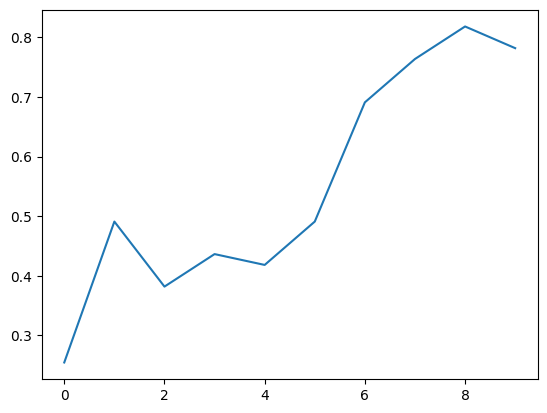

In [ ]:
plt.plot(history.history['accuracy'],label='ket qua huan luyen')
plt.plot(history.history['val_accuracy'],label='ket qua kiem tra')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

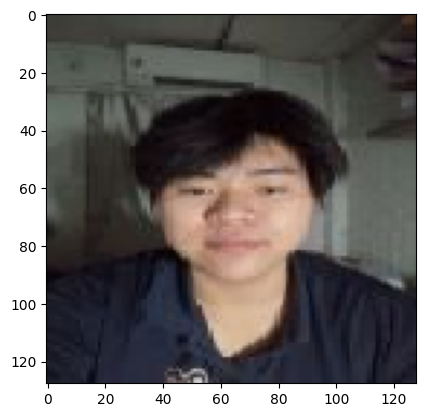

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
tri


In [4]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

path='/content/drive/MyDrive/Colab Notebooks/face/tri/z6390450876506_b9a8e9e463d09a25eb84bdf323739095.jpg'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)

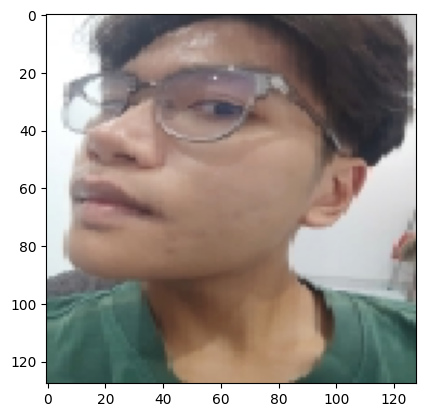

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
phat


In [5]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

path='/content/drive/MyDrive/Colab Notebooks/face/phat/z6390301246061_6d6a8d133e8f030003d37e374888e747.jpg'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)

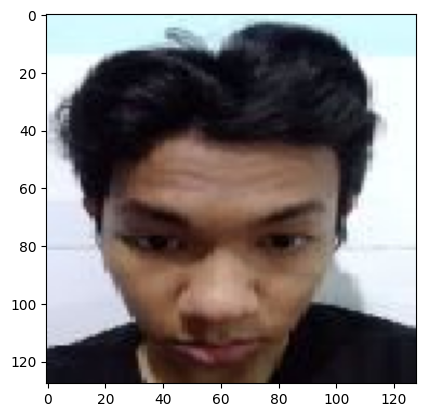

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
duc


In [6]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

path='/content/drive/MyDrive/Colab Notebooks/face/duc/z6389406396771_bf048c3b841e71b869f1c7efa02613d7.jpg'
img=load_img(path,target_size=(128,128))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
img_array=img_array/255.0
img_array = img_array.reshape(1,128,128,3)
prediction=np.argmax(model.predict(img_array))
class_labels={v:k for k,v in train_generator.class_indices.items()}
person_name=class_labels[prediction]
print(person_name)